# Name: Safa Khan- 2110828 , Raghad Saleh-2105931



# **1-Import the necessary libraries and load the dataset**

In [22]:
from google.colab import files
import zipfile
import os
import cv2
from skimage.feature import hog, local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# A list containing the paths to the zip files‍
zip_paths =['/content/barrel_images_temp.zip','/content/lions_images_temp.zip']

# Unzipping each file in the list‍
for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/dataset")

# **2- Extract features by using HOG**

In [23]:
# Import necessary libraries
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Paths
dataset_path = "/content/dataset"
class1_path = os.path.join(dataset_path, "/content/dataset/barrel_images_temp")
class2_path = os.path.join(dataset_path, "/content/dataset/lions_images_temp")

# Parameters for HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

# Initialize data and labels
data = []
labels = []

# Helper function to load images and extract features using HOG
def process_directory(path, label):
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        if img is not None:
            # Resize image for consistency
            img_resized = cv2.resize(img, (128, 128))
            # Extract HOG features
            features = hog(img_resized, **hog_params)
            data.append(features)
            labels.append(label)

# Process both directories
process_directory(class1_path, label=0)  # Class1 label = 0
process_directory(class2_path, label=1)  # Class2 label = 1

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)




# **3- Split dataset into traing and Testing set**

In [24]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



# **4-Train Knn model**

Best k: 31 with metrics:
  Accuracy: 0.7750
  Precision: 0.7783
  Recall: 0.7724
  F1-Score: 0.7730


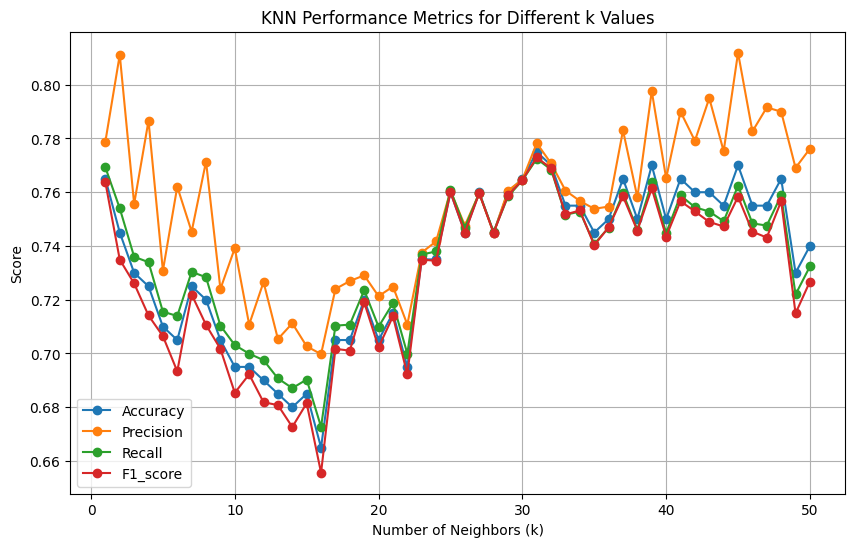

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the range of k values to try
k_values = range(1, 51)  # Try k from 1 to 50
evaluation_metrics = []

best_k = None
best_avg_f1 = 0

for k in k_values:
    # Initialize the KNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on the validation or test set
    y_pred = knn.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store metrics for analysis
    evaluation_metrics.append({
        "k": k,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })

    # Update best k if the current average F1-score is better
    if f1 > best_avg_f1:
        best_avg_f1 = f1
        best_k = k

# Output the best k and its metrics
print(f"Best k: {best_k} with metrics:")
best_metrics = next(item for item in evaluation_metrics if item["k"] == best_k)
print(f"  Accuracy: {best_metrics['accuracy']:.4f}")
print(f"  Precision: {best_metrics['precision']:.4f}")
print(f"  Recall: {best_metrics['recall']:.4f}")
print(f"  F1-Score: {best_metrics['f1_score']:.4f}")

# Plot performance metrics for each k
metrics_to_plot = ["accuracy", "precision", "recall", "f1_score"]
plt.figure(figsize=(10, 6))

for metric in metrics_to_plot:
    plt.plot(k_values, [m[metric] for m in evaluation_metrics], marker='o', label=metric.capitalize())

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Performance Metrics for Different k Values')
plt.legend()
plt.grid()
plt.show()


# **4- analyze the model**

In [56]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67        96
           1       0.69      0.92      0.79       104

    accuracy                           0.74       200
   macro avg       0.78      0.73      0.73       200
weighted avg       0.77      0.74      0.73       200



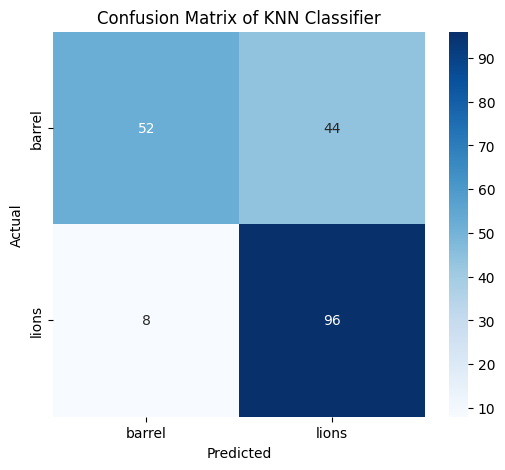

In [57]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['barrel', 'lions'], yticklabels=['barrel', 'lions'])
plt.title('Confusion Matrix of KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()